In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-dataset/suicide_dataset.csv


# **Import Libraries and Data**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import textwrap

**Reading the Data**

In [3]:
suicide_data = pd.read_csv('../input/suicide-dataset/suicide_dataset.csv')
suicide_data.head()

,Country,Sex,Year,Suicide Rate,Mental hospitals (per 100 000 population),Mental health units in general hospitals (per 100 000 population),Mental health outpatient facilities (per 100 000 population),Mental health day treatment facilities (per 100 000 population),Community residential facilities (per 100 000 population),Psychiatrists working in mental health sector (per 100 000 population),...,Social workers working in mental health sector (per 100 000 population),Psychologists working in mental health sector (per 100 000 population),Government expenditures on mental hospitals as a percentage of total government expenditures on mental health (%),Stand-alone law for mental health,Year the law was enacted (latest revision),Stand-alone policy or plan for mental health,Publication year of the policy or plan (latest revision),Beds in community residential facilities (per 100k population),Beds in mental hospitals (per 100k population),Beds for mental health in general hospitals (per 100k population)
0,Afghanistan,Both sexes,2000,8.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Male,2000,14.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Female,2000,1.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Both sexes,2000,5.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,Male,2000,8.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's know the number of nan in each column

In [4]:
suicide_data.isnull().sum()

Country                                                                                                                 0
Sex                                                                                                                   521
Year                                                                                                                    0
Suicide Rate                                                                                                          521
Mental hospitals (per 100 000 population)                                                                            2366
Mental health units in general hospitals (per 100 000 population)                                                    2343
Mental health outpatient facilities (per 100 000 population)                                                         2350
Mental health day treatment facilities (per 100 000 population)                                                      2525
Community residential fa

Notice that each of the column have more than half it's input as nan, so we clean the data.

# **Cleaning the Data**

**Removing all the unmwanted columns**

In [5]:
Nan_columns = suicide_data.iloc[:,4:22]
suicide_data.drop(Nan_columns, axis=1,inplace=True)
suicide_data.head(5)

,Country,Sex,Year,Suicide Rate
0,Afghanistan,Both sexes,2000,8.1
1,Afghanistan,Male,2000,14.3
2,Afghanistan,Female,2000,1.7
3,Albania,Both sexes,2000,5.8
4,Albania,Male,2000,8.2


**Cleaning the Suicide Rate column values**

I replaced the nan values with the mean.

In [6]:
mean_value = round(suicide_data['Suicide Rate'].mean(),1)
suicide_data['Suicide Rate'].replace(np.nan, mean_value, inplace=True)
suicide_data.head(5)

,Country,Sex,Year,Suicide Rate
0,Afghanistan,Both sexes,2000,8.1
1,Afghanistan,Male,2000,14.3
2,Afghanistan,Female,2000,1.7
3,Albania,Both sexes,2000,5.8
4,Albania,Male,2000,8.2


I dropped all nan in the dataframe.

In [7]:
suicide_data = suicide_data.dropna()
suicide_data

,Country,Sex,Year,Suicide Rate
0,Afghanistan,Both sexes,2000,8.1
1,Afghanistan,Male,2000,14.3
2,Afghanistan,Female,2000,1.7
3,Albania,Both sexes,2000,5.8
4,Albania,Male,2000,8.2
...,...,...,...,...
2191,Zambia,Male,2016,17.5
2192,Zambia,Female,2016,6.2
2193,Zimbabwe,Both sexes,2016,19.1
2194,Zimbabwe,Male,2016,29.1


# **Visualization**

# **Country**

Lets examine the suicide rate in the Year 2000

In [8]:
suicide_data2000 = suicide_data.loc[suicide_data.Year.isin(['2000'])]
suicide_data2000.head(5)

,Country,Sex,Year,Suicide Rate
0,Afghanistan,Both sexes,2000,8.1
1,Afghanistan,Male,2000,14.3
2,Afghanistan,Female,2000,1.7
3,Albania,Both sexes,2000,5.8
4,Albania,Male,2000,8.2


In [9]:
su_data2000 = suicide_data2000.groupby('Country')['Suicide Rate'].sum().reset_index()
Su_data2000 = su_data2000.sort_values('Suicide Rate',ascending=False).head(8)
Su_data2000.reset_index(inplace=True)

su_data2000min = suicide_data2000.groupby('Country')['Suicide Rate'].sum().reset_index()
Su_data2000min = su_data2000min.sort_values('Suicide Rate',ascending=True).head(8)
Su_data2000min.reset_index(inplace=True)

print(Su_data2000, '\n')
print(Su_data2000min)

   index             Country  Suicide Rate
0    135  Russian Federation         147.0
1     96           Lithuania         143.6
2     14             Belarus         120.1
3     85          Kazakhstan         108.4
4    170             Ukraine          99.6
5     91              Latvia          93.5
6    154           Sri Lanka          91.6
7     70              Guyana          80.7 

   index               Country  Suicide Rate
0     88                Kuwait           4.8
1    159  Syrian Arab Republic           5.5
2     13              Barbados           6.3
3     41                Cyprus           6.3
4      4   Antigua and Barbuda           6.5
5     10               Bahamas           6.6
6      9            Azerbaijan           7.5
7     82               Jamaica           7.5


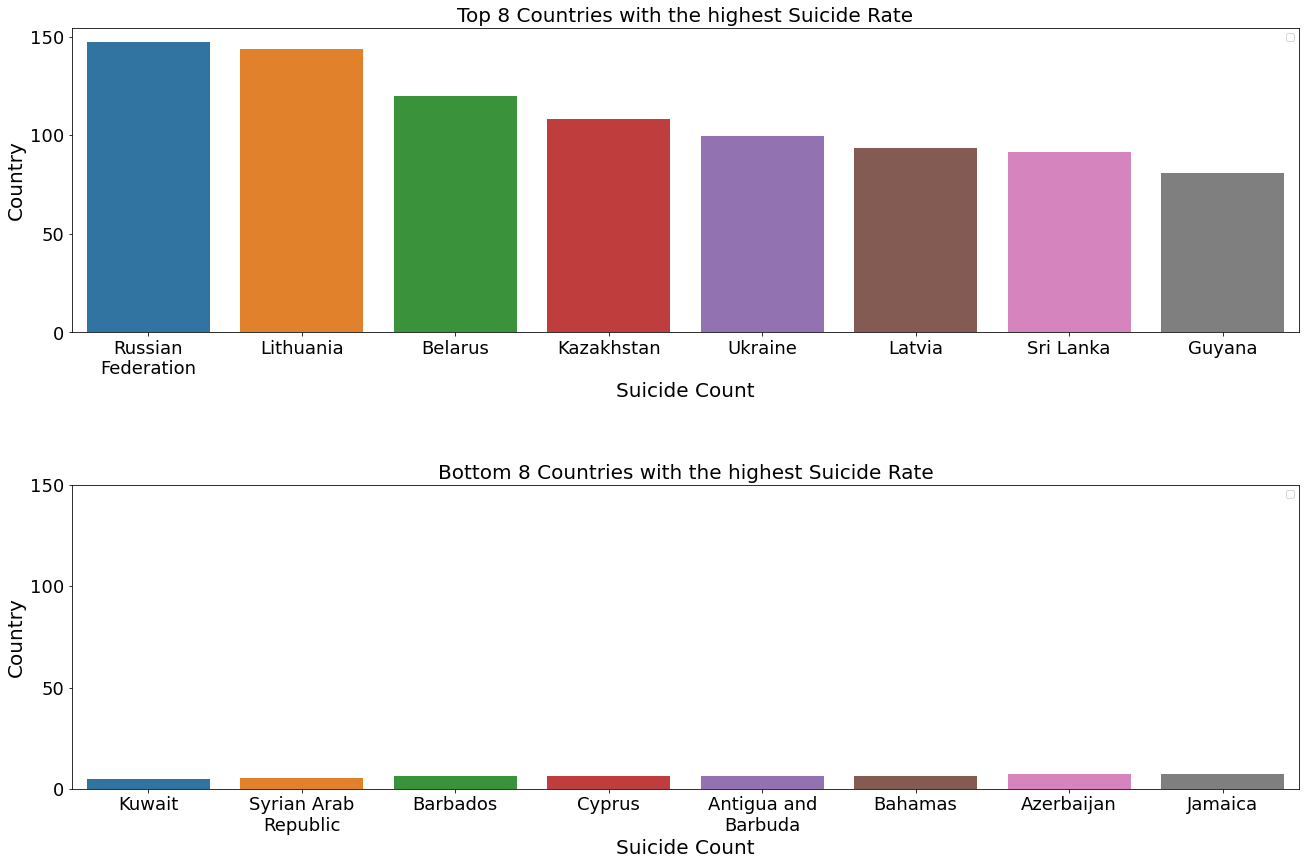

In [10]:
max_width = 15
suicide = [Su_data2000,Su_data2000min]
suicide_title = ['Top 8', 'Bottom 8']
fig, ax = plt.subplots(2,1, figsize = (22,14))
fig.subplots_adjust(hspace = 0.5)
for i in range(0,2):
    sns.barplot(ax = ax[i], data = suicide[i], x = 'Country', y = 'Suicide Rate')
    sns.barplot(ax = ax[i], data = suicide[i], x = 'Country', y = 'Suicide Rate')
    ax[i].legend()
    ax[i].set_title(suicide_title[i]+' Countries with the highest Suicide Rate', fontsize = 20)
    ax[i].set_ylabel('Country', fontsize = 20)
    ax[i].set_xlabel('Suicide Count', fontsize = 20)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 200, step = 50))
    ax[i].tick_params(labelsize = 18)
    
plt.show()

Let's see the countries with the highest suicidal rate

In [11]:
suicide_datac = suicide_data.groupby('Country')['Suicide Rate'].sum().reset_index()
Suicide_datac = suicide_datac.sort_values('Suicide Rate',ascending=False).head(12)
Suicide_datac

,Country,Suicide Rate
135,Russian Federation,421.6
96,Lithuania,409.9
85,Kazakhstan,355.7
14,Belarus,353.1
70,Guyana,351.2
93,Lesotho,326.4
156,Suriname,308.8
170,Ukraine,287.1
91,Latvia,259.1
131,Republic of Korea,256.3


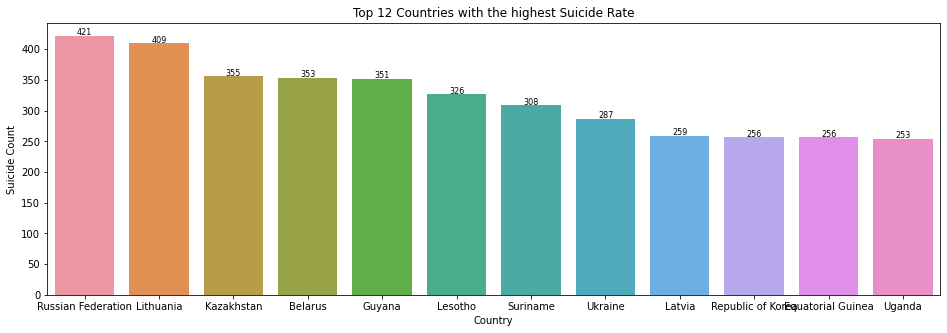

In [12]:
fig, ax = plt.subplots(figsize = [16,5])
sns.barplot(data = Suicide_datac,x = 'Country',y = 'Suicide Rate', ax = ax)
ax.set_ylabel('Suicide Count')
ax.set_title('Top 12 Countries with the highest Suicide Rate')
for index,Suicide_datac in enumerate(Suicide_datac['Suicide Rate'].astype(int)):
       ax.text(x=index-0.1 , y =Suicide_datac+2 , s=f"{Suicide_datac}" , fontdict=dict(fontsize=8))
plt.show()

# **SEX**

In [13]:
sex_suicide = suicide_data2000.groupby('Sex')['Suicide Rate'].sum().reset_index()
Sex_suicide = sex_suicide.sort_values('Suicide Rate',ascending=False)
Sex_suicide

,Sex,Suicide Rate
2,Male,3317.3
0,Both sexes,2195.4
1,Female,1165.4


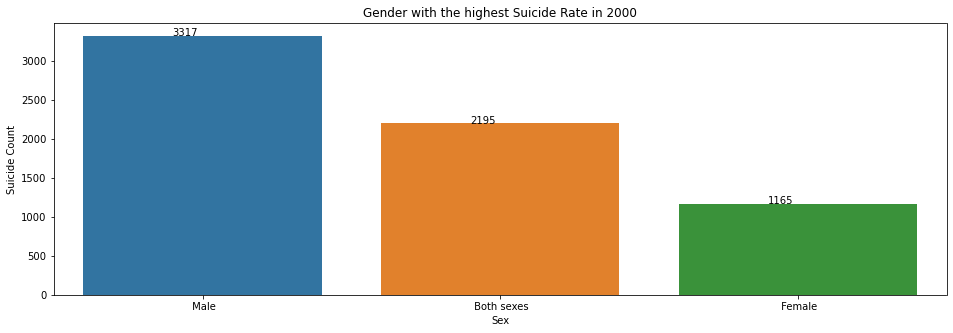

In [14]:
fig, ax = plt.subplots(figsize = [16,5])
sns.barplot(data = Sex_suicide,x = 'Sex',y = 'Suicide Rate', ax = ax)
ax.set_ylabel('Suicide Count')
ax.set_title('Gender with the highest Suicide Rate in 2000')
for index,Sex_suicide in enumerate(Sex_suicide['Suicide Rate'].astype(int)):
       ax.text(x=index-0.1 , y =Sex_suicide+1 , s=f"{Sex_suicide}" , fontdict=dict(fontsize=10))
plt.show()

It's so sad knowing males had the highest number of suicide rate in 2000.

Since the Russian Federation had the highest number of suicide rate, let's take a look at which gender had the highest number in Russia.

In [15]:
gender_russia = suicide_data2000.loc[suicide_data2000.Country.isin(['Russian Federation'])]
gender_russia.head()

,Country,Sex,Year,Suicide Rate
405,Russian Federation,Both sexes,2000,47.5
406,Russian Federation,Male,2000,85.8
407,Russian Federation,Female,2000,13.7


In [16]:
import plotly.express as px
fig = px.pie(gender_russia, values=gender_russia['Suicide Rate'], names=gender_russia['Sex'])
fig.update_layout(title = 'Gender with high Suicidal Rate')
fig.show()

From the graph above, male gender has the highest number of suicide rate in Russia.

# **YEAR**

In [17]:
year_suicide = suicide_data.groupby('Year')['Suicide Rate'].sum().reset_index()
year_suicide

,Year,Suicide Rate
0,2000,6678.1
1,2010,5789.2
2,2015,5449.2
3,2016,5376.1


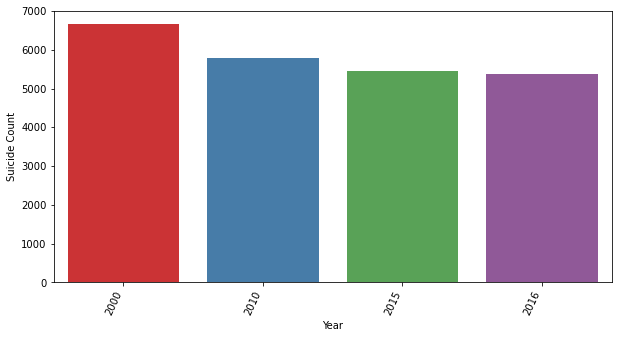

In [18]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=year_suicide,
    x='Year',
    y='Suicide Rate',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Suicide Count")

# **Relation between Year and Suicide Rate**

In [19]:
import plotly.express as px
fig = px.line(y=year_suicide['Suicide Rate'], x=year_suicide['Year'], labels={'y':'Suicide Count', 'x':'Year'})
fig.update_layout(title = 'Relation between the Year and Suicide Rate')
fig.show()

From the graph above,it shows how suicide rates dropped over the years. Maybe some extra measures has been put in place to reduce it.

In [20]:
suicide_data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gree

# **SUICIDE RATES IN SOME AFRICAN COUNTRIES**

Let's take the suicide rate of 10 random African countries

In [21]:
suicide_Afr = suicide_data.loc[suicide_data.Country.isin(['Egypt','Nigeria','Ghana','South Africa','Tunisia','Uganda','Liberia','Sudan','Equatorial Guinea','Cameroon'])]
suicide_Afr

,Country,Sex,Year,Suicide Rate
87,Cameroon,Both sexes,2000,21.3
88,Cameroon,Male,2000,28.4
89,Cameroon,Female,2000,14.6
150,Egypt,Both sexes,2000,3.9
151,Egypt,Male,2000,6.3
...,...,...,...,...
2146,Tunisia,Male,2016,4.4
2147,Tunisia,Female,2016,2.2
2154,Uganda,Both sexes,2016,20.0
2155,Uganda,Male,2016,21.2


In [22]:
su_dataAfric = suicide_Afr.groupby('Country')['Suicide Rate'].sum().reset_index()
Su_dataAfric = su_dataAfric.sort_values('Suicide Rate',ascending=False).head(10)
Su_dataAfric

,Country,Suicide Rate
2,Equatorial Guinea,256.3
9,Uganda,253.3
0,Cameroon,238.9
5,Nigeria,213.7
6,South Africa,167.2
4,Liberia,151.9
7,Sudan,114.3
3,Ghana,101.0
1,Egypt,49.8
8,Tunisia,42.1


In [23]:
import plotly.express as px

fig = px.choropleth(locations= Su_dataAfric['Country'], 
                    locationmode="country names", 
                    color= Su_dataAfric['Suicide Rate'],
                    labels={'color':'Suicide Rate', 'locations':'Country'},
                    scope="africa") 


fig.update_layout(
    
    title_text = 'Top 10 Countries in Africa with High Suicide Rate',
    geo_scope='africa'
)
fig.show()

**SUICIDE RATES IN SOME COUNTRIES IN ASIA**

Let's pick random 10 countries in Asia.

In [24]:
suicide_Asia = suicide_data.loc[suicide_data.Country.isin(['India','Viet Nam','Republic of Korea','Japan','China','Malaysia','Thailand','Indonesia','Singapore','Malaysia'])]
suicide_Asia

,Country,Sex,Year,Suicide Rate
102,China,Both sexes,2000,14.1
103,China,Male,2000,12.7
104,China,Female,2000,15.6
225,India,Both sexes,2000,18.7
226,India,Male,2000,21.3
...,...,...,...,...
2131,Thailand,Male,2016,21.4
2132,Thailand,Female,2016,4.8
2184,Viet Nam,Both sexes,2016,7.0
2185,Viet Nam,Male,2016,10.8


In [25]:
su_dataAsia = suicide_Asia.groupby('Country')['Suicide Rate'].sum().reset_index()
Su_dataAsia = su_dataAsia.sort_values('Suicide Rate',ascending=False).head(10)
Su_dataAsia

,Country,Suicide Rate
5,Republic of Korea,256.3
1,India,207.1
3,Japan,201.9
7,Thailand,166.2
0,China,121.1
6,Singapore,107.7
8,Viet Nam,87.1
4,Malaysia,78.0
2,Indonesia,47.2


In [26]:
fig = px.choropleth(locations= Su_dataAsia['Country'], 
                    locationmode="country names", 
                    color= Su_dataAsia['Suicide Rate'],
                    labels={'color':'Suicide Rate', 'locations':'Country'},
                    scope="asia") 


fig.update_layout(
    
    title_text = 'Top 10 Countries in Asia with High Suicide Rate',
    geo_scope='asia'
)
fig.show()

**If you found this notebook useful, give me an upvote!. Suggestions for improvements are welcomed**